## Importing Libraries

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#path to dataset
dir_path = '/content/drive/MyDrive/CTLungCancer/Data'
train_path = '/content/drive/MyDrive/CTLungCancer/Data/train'
test_path = '/content/drive/MyDrive/CTLungCancer/Data/test'
val_path = '/content/drive/MyDrive/CTLungCancer/Data/valid'

In [3]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
    
train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 155, 'normal': 148, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 115, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 195} 

 {'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15, 'normal': 13, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23} 

 {'squamous.cell.carcinoma': 90, 'normal': 54, 'adenocarcinoma': 120, 'large.cell.carcinoma': 51}


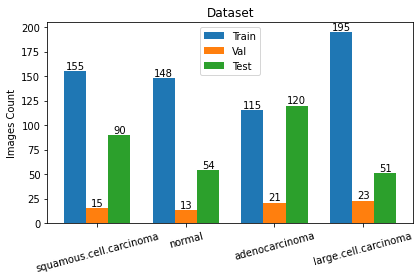

In [4]:
labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

fig.tight_layout()

plt.show()

## Importing Keras for Image Classification

In [5]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout

In [6]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [7]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [9]:
val_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [10]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [11]:
test_data.class_indices

{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

## CNN Model

In [12]:
model = Sequential() 

# Convolutional Layer with input shape (350,350,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
#model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 346, 346, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 173, 173, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 171, 171, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 83, 83, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 128)       0

2022-01-29 06:57:17.795105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 06:57:17.887235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 06:57:17.888006: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 06:57:17.889146: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_cnn_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [14]:
# Fitting the Model
cnn = model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 32, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

2022-01-29 06:57:20.572527: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/32


2022-01-29 06:57:22.033275: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


122/122 [==============================] - 33s 209ms/step - loss: 1.3134 - accuracy: 0.3651 - val_loss: 1.0243 - val_accuracy: 0.4429

Epoch 00001: val_accuracy improved from -inf to 0.44286, saving model to ./ct_cnn_best_model.hdf5
Epoch 2/32
122/122 [==============================] - 18s 147ms/step - loss: 1.2326 - accuracy: 0.4293 - val_loss: 1.0345 - val_accuracy: 0.4714

Epoch 00002: val_accuracy improved from 0.44286 to 0.47143, saving model to ./ct_cnn_best_model.hdf5
Epoch 3/32
122/122 [==============================] - 19s 156ms/step - loss: 1.1750 - accuracy: 0.4260 - val_loss: 1.0451 - val_accuracy: 0.4857

Epoch 00003: val_accuracy improved from 0.47143 to 0.48571, saving model to ./ct_cnn_best_model.hdf5
Epoch 4/32
122/122 [==============================] - 18s 144ms/step - loss: 1.1725 - accuracy: 0.4539 - val_loss: 1.0525 - val_accuracy: 0.5143

Epoch 00004: val_accuracy improved from 0.48571 to 0.51429, saving model to ./ct_cnn_best_model.hdf5
Epoch 5/32
122/122 [======

In [15]:
# Loading the Best Fit Model 
model = load_model("./ct_cnn_best_model.hdf5")

In [16]:
# Checking the Accuracy of the Model 
accuracy_cnn = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_cnn*100} %")

The accuracy of the model is = 52.3809552192688 %


In [17]:
cnn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

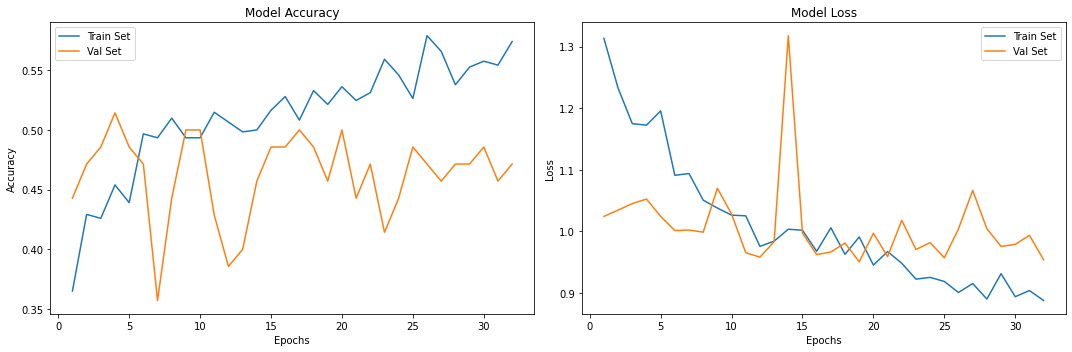

In [18]:
# Plot model performance
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## VGG16 Model

In [19]:
base_model = VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(350,350,3)
)

58900480/58889256 [==============================] - 0s 0us/step


In [20]:
NUM_CLASSES = 4

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 10, 10, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 51200)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 204804    
Total params: 14,919,492
Trainable params: 204,804
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_vgg_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [ mc];

In [22]:
# Fitting the Model
vgg = vgg_model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 32, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/32
122/122 [==============================] - 22s 166ms/step - loss: 2.2902 - accuracy: 0.5164 - val_loss: 2.6807 - val_accuracy: 0.4857

Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to ./ct_vgg_best_model.hdf5
Epoch 2/32
122/122 [==============================] - 21s 168ms/step - loss: 1.3663 - accuracy: 0.5938 - val_loss: 2.4951 - val_accuracy: 0.4714

Epoch 00002: val_accuracy did not improve from 0.48571
Epoch 3/32
122/122 [==============================] - 20s 162ms/step - loss: 1.6620 - accuracy: 0.6299 - val_loss: 1.5444 - val_accuracy: 0.6000

Epoch 00003: val_accuracy improved from 0.48571 to 0.60000, saving model to ./ct_vgg_best_model.hdf5
Epoch 4/32
122/122 [==============================] - 20s 165ms/step - loss: 1.2455 - accuracy: 0.6694 - val_loss: 3.9462 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.60000
Epoch 5/32
122/122 [==============================] - 19s 159ms/step - loss: 1.3598 - accuracy: 0.6809 - va

In [23]:
# Loading the Best Fit Model 
model = load_model("./ct_vgg_best_model.hdf5")

In [24]:
# Checking the Accuracy of the Model 
accuracy_vgg = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_vgg*100} %")

The accuracy of the model is = 80.3174614906311 %


In [25]:
vgg.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

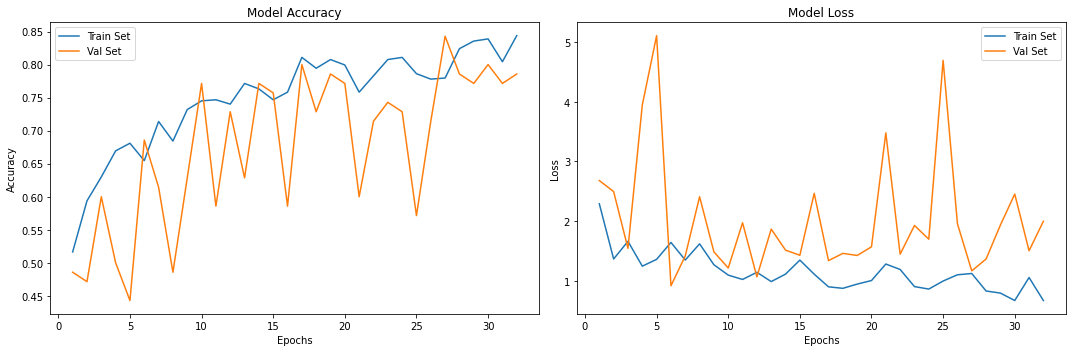

In [26]:
# Plot model performance
acc = vgg.history['accuracy']
val_acc = vgg.history['val_accuracy']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']
epochs_range = range(1, len(vgg.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## Inceptionv3 Model

In [27]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (350, 350, 3), 
                         include_top = False, 
                         weights = 'imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [28]:
for layer in base_model.layers:
    layer.trainable = False

In [29]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 4 node for classification output
x = layers.Dense(4, activation='sigmoid')(x)

model_incep = tf.keras.models.Model(base_model.input, x)

model_incep.compile(optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

In [30]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_incep_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [31]:
# Fitting the Model
incep = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 32, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/32
122/122 [==============================] - 25s 175ms/step - loss: 8.1182 - accuracy: 0.4507 - val_loss: 7.0153 - val_accuracy: 0.3857

Epoch 00001: val_accuracy improved from -inf to 0.38571, saving model to ./ct_incep_best_model.hdf5
Epoch 2/32
122/122 [==============================] - 22s 177ms/step - loss: 3.1930 - accuracy: 0.5526 - val_loss: 4.8674 - val_accuracy: 0.4000

Epoch 00002: val_accuracy improved from 0.38571 to 0.40000, saving model to ./ct_incep_best_model.hdf5
Epoch 3/32
122/122 [==============================] - 22s 184ms/step - loss: 1.8200 - accuracy: 0.6069 - val_loss: 1.3577 - val_accuracy: 0.5286

Epoch 00003: val_accuracy improved from 0.40000 to 0.52857, saving model to ./ct_incep_best_model.hdf5
Epoch 4/32
122/122 [==============================] - 22s 179ms/step - loss: 1.3759 - accuracy: 0.6497 - val_loss: 1.5854 - val_accuracy: 0.5286

Epoch 00004: val_accuracy did not improve from 0.52857
Epoch 5/32
122/122 [==============================] - 2

In [32]:
# Loading the Best Fit Model 
model = load_model("./ct_incep_best_model.hdf5")

In [33]:
# Checking the Accuracy of the Model 
accuracy_incep = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_incep*100} %")

The accuracy of the model is = 73.96825551986694 %


In [34]:
incep.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

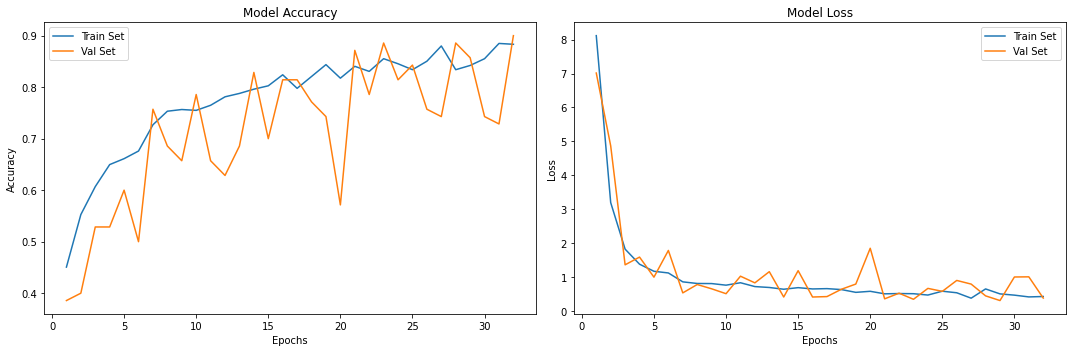

In [35]:
# Plot model performance
acc = incep.history['accuracy']
val_acc = incep.history['val_accuracy']
loss = incep.history['loss']
val_loss = incep.history['val_loss']
epochs_range = range(1, len(incep.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## RestNet50 Model

In [36]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(350, 350,3),
                      include_top=False, weights="imagenet", 
                      pooling='max')

94781440/94765736 [==============================] - 0s 0us/step


In [37]:
for layer in base_model.layers:
    layer.trainable = False

In [38]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))

In [39]:
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy'])

In [40]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_resnet_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [41]:
# Fitting the Model
resnet = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 32, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/32
122/122 [==============================] - 20s 164ms/step - loss: 0.4358 - accuracy: 0.8882 - val_loss: 0.2339 - val_accuracy: 0.9286

Epoch 00001: val_accuracy improved from -inf to 0.92857, saving model to ./ct_resnet_best_model.hdf5
Epoch 2/32
122/122 [==============================] - 23s 191ms/step - loss: 0.3997 - accuracy: 0.8882 - val_loss: 0.6276 - val_accuracy: 0.8000

Epoch 00002: val_accuracy did not improve from 0.92857
Epoch 3/32
122/122 [==============================] - 22s 180ms/step - loss: 0.3605 - accuracy: 0.8931 - val_loss: 0.8815 - val_accuracy: 0.7286

Epoch 00003: val_accuracy did not improve from 0.92857
Epoch 4/32
122/122 [==============================] - 23s 186ms/step - loss: 0.3738 - accuracy: 0.8832 - val_loss: 0.8175 - val_accuracy: 0.7857

Epoch 00004: val_accuracy did not improve from 0.92857
Epoch 5/32
122/122 [==============================] - 23s 185ms/step - loss: 0.3842 - accuracy: 0.8914 - val_loss: 0.6140 - val_accuracy: 0.8714

Epoc

In [42]:
# Loading the Best Fit Model 
model = load_model("./ct_resnet_best_model.hdf5")

In [43]:
# Checking the Accuracy of the Model 
accuracy_resnet = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_resnet*100} %")

The accuracy of the model is = 84.44444537162781 %


In [44]:
resnet.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

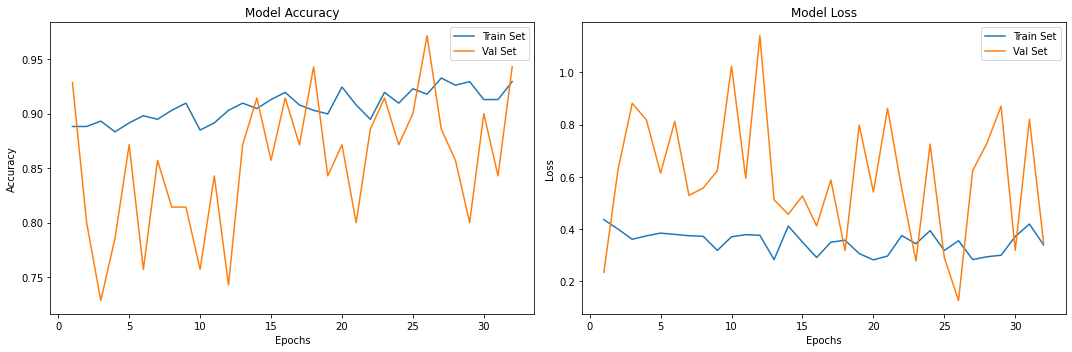

In [45]:
# Plot model performance
acc = resnet.history['accuracy']
val_acc = resnet.history['val_accuracy']
loss = resnet.history['loss']
val_loss = resnet.history['val_loss']
epochs_range = range(1, len(resnet.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

## Comparison

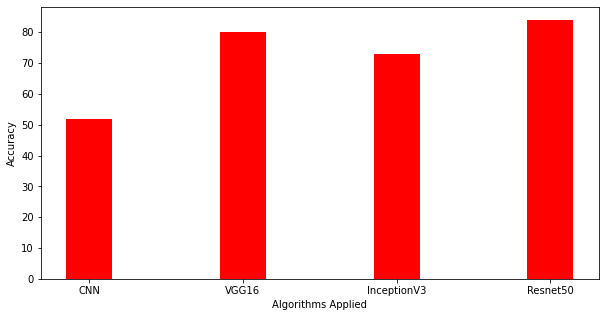

In [46]:
algos = ['CNN', 'VGG16', 'InceptionV3', 'Resnet50']
accuracy = [accuracy_cnn, accuracy_vgg, accuracy_incep, accuracy_resnet]
accuracy = np.floor([i * 100 for i in accuracy])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algos, accuracy, color ='red', width = 0.3)
 
plt.xlabel("Algorithms Applied")
plt.ylabel("Accuracy")
plt.show()

### Predictions

In [47]:
def chestScanPrediction(path, _model):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
    # Loading Image
    img = image.load_img(path, target_size=(350,350))
    # Normalizing Image
    norm_img = image.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    # Getting Predictions
    pred = np.argmax(_model.predict(input_arr_img))
    # Printing Model Prediction
    print(classes_dir[pred])

In [48]:
path = "../input/chest-ctscan-images/Data/test/large.cell.carcinoma/000110.png"
chestScanPrediction(path,model_incep)

Large cell carcinoma
